In [29]:
import numpy as np
import matplotlib.pyplot as plt

## Oppgave 1a

In [30]:
data = [74, 64, 62, 54, 47, 39, 40, 35, 34, 29, 34, 30, 31, 22, 14, 14, 13, 25, 18, 11, 13, 16, 13, 12, 10, 12, 11, 13, 9, 8, 7, 5, 5, 4, 5, 2, 1, 3, 2, 2, 1, 1, 1, 0, 0, 1, 2, 0, 1, 1]
time_points = [15 * i for i in range(len(data))]

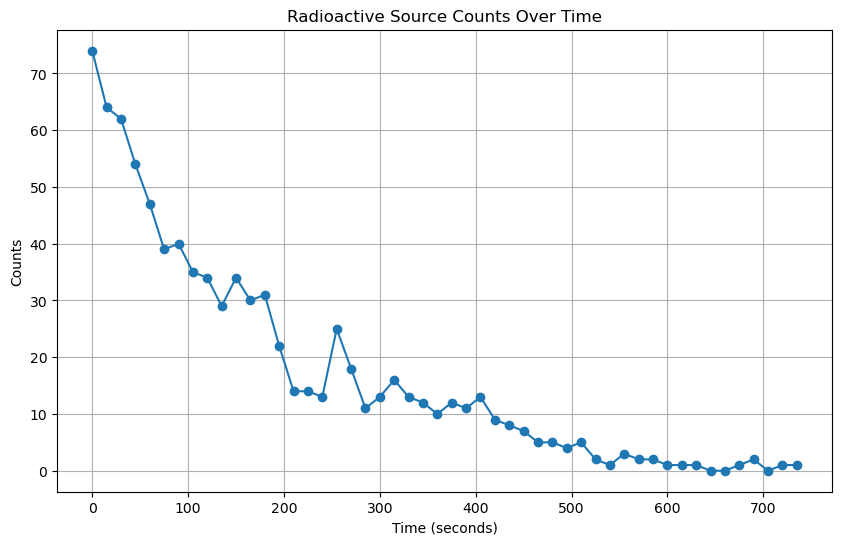

In [31]:
# Plotting the counts as a function of time
plt.figure(figsize=(10, 6))
plt.plot(time_points, data, marker='o', linestyle='-')
plt.title('Radioactive Source Counts Over Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Counts')
plt.grid(True)
plt.show()

## OPPGAVE 1b   - Papir

## OPPGAVE 1c

Ja, av den grunn at løsningen vi har fra b , er gitt ved den generelle løsningen

r(t) = e^-kt * e^c1

Videre forklaring

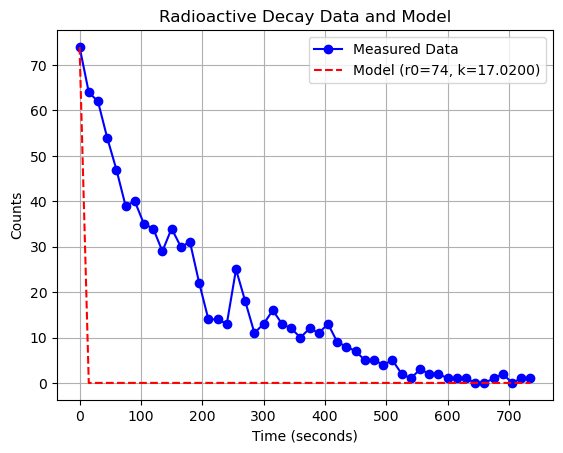

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def radioactive_decay(r0, k, time_points):
    """
    Solve the radioactive decay equation and return the counts over time.

    Parameters:
    - r0: Initial strength at t = 0.
    - k: Decay constant.
    - time_points: List of time points at which counts are measured.

    Returns:
    - counts: List of counts at the specified time points.
    """
    counts = [r0 * np.exp(-k * t) for t in time_points]
    return counts

def plot_radioactive_decay(data, time_points, r0, k):
    """
    Plot the radioactive decay data along with the model predictions.

    Parameters:
    - data: List of measured counts at corresponding time points.
    - time_points: List of time points.
    - r0: Initial strength at t = 0.
    - k: Decay constant.
    """
    model_counts = radioactive_decay(r0, k, time_points)

    plt.plot(time_points, data, label="Measured Data", marker='o', linestyle='-', color='b')
    plt.plot(time_points, model_counts, label=f"Model (r0={r0}, k={k:.4f})", linestyle='--', color='r')

    plt.xlabel("Time (seconds)")
    plt.ylabel("Counts")
    plt.title("Radioactive Decay Data and Model")
    plt.legend()
    plt.grid(True)
    plt.show()

r0 = data[0]  # Initial strength at t = 15 seconds
k = sum(data) / len(data)  # A sample decay constant (you can adjust this value)

plot_radioactive_decay(data, time_points, r0, k)


## OPPGAVE 1d

i)

In [33]:
half_count = data[0] / 2
half_life_index = np.argmin(np.abs(np.array(data) - half_count)) #Usikker på denne linjen

# Calculate the estimated half-life
half_life = time_points[half_life_index] # Finner verdien for index 5 , som er 90 sekunder i half_life_index, slik vi kan printe nederst

print("Estimated half-life:", half_life, "seconds")

Estimated half-life: 75 seconds


Halveringstiden, ser vi på initiell verdi og deler den på 2
Så ser vi på når i indexen at vi havner under halve verdien - 74/2 = 37



Verdien for index 5 = 39, så den er ikke helt halvert? Derfor usikker på linjen ovenfor

ii)

Jeg har fra tidligere: r(t) = e^-kt * e^c1

ln (rt) = -kt + c

Antar c = 0

ln (rt) = -kt       -> Løser for k

k = - (ln(rt) / t)

1/2 = - ln(rt)/t

t = 90


iii) fix k

For å fikse k

k = 2 / 1/2t

iv) 

In [34]:
import numpy as np

def estimate_decay_constant(half_life):
    """
    Estimate the decay constant (k) based on the estimated half-life.

    Parameters:
    - half_life: Estimated half-life of the decay process.

    Returns:
    - decay_constant: Estimated decay constant (k).
    """
    decay_constant = np.log(2) / half_life
    return decay_constant


In [36]:
decay_constant_estimate = estimate_decay_constant(half_life)
print("Estimated decay constant (k):", decay_constant_estimate)

Estimated decay constant (k): 0.009241962407465937


v)

Ville fått samme svar nesten, men litt vanskeligere fremgangsmåte

Vi) 

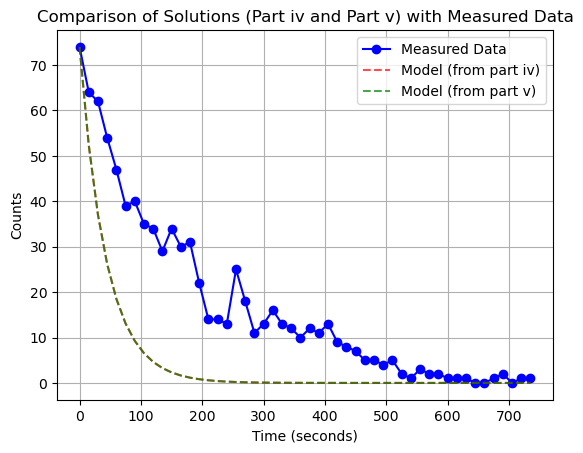

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define the radioactive decay equation
def radioactive_decay(r0, k, time_points):
    counts = [r0 * np.exp(-k * t) for t in time_points]
    return counts

# Estimate k and r0 using the half-life as in part iv)
half_life_estimate = 30  # Use the value you estimated in part i
k_estimate = np.log(2) / half_life_estimate
r0_estimate = data[0]  # Initial counts at t = 15

# Solve the decay equation with the estimated k and r0
time_points = [15 * i for i in range(len(data))]
solution_part_iv = radioactive_decay(r0_estimate, k_estimate, time_points)

# Solve the decay equation with r(15) = 74 as in part v)
r0_v = 74  # Initial strength at t = 15 seconds
k_v = np.log(2) / half_life_estimate  # Use the same k as in part iv
solution_part_v = radioactive_decay(r0_v, k_v, time_points)

# Plot the solutions along with the measured data
plt.plot(time_points, data, label="Measured Data", marker='o', linestyle='-', color='b')
plt.plot(time_points, solution_part_iv, label="Model (from part iv)", linestyle='--', color='r', alpha=0.7)
plt.plot(time_points, solution_part_v, label="Model (from part v)", linestyle='--', color='g', alpha=0.7)

plt.xlabel("Time (seconds)")
plt.ylabel("Counts")
plt.title("Comparison of Solutions (Part iv and Part v) with Measured Data")
plt.legend()
plt.grid(True)
plt.show()